#Apendix A - Classification trough Feature Selection/Feature Extraction <br> Using Machine Leaning Models

In this section, an approach to image classification using machine learning models, Logistic Regression, Support Vector Machine and Random Forest, was taken. The main objective of this section is to use an statistical approach to the image dataset by using  histograms, corners, edges, ridges, entropy and moments, among others, to find the best features that can describe each of the three categories in the quest to determine the severity of the cars. It is important to note that one of the main benefits of this approach is that by maintaining the original features no loss in the model interpretability is observed.

In order to build a robust database that could contain features specific to each category, different features like texture, edges and corners were observed in addition to specific measurements like entropy and moments.
As part of the texture features, information gained from the Gray-Level Co-Occurrence Matrix  (GLCM)  was captured and used as features. The GLCM functions characterize the texture of an image by calculating how often pairs of pixels with specific values and in a specified spatial relationship occur in an image. Among some of the statistical measurements that can be obtained from a GCLC are the mean, variance, correlation, contrast, IDM (inverse difference moment), ASM (angular second moment), entropy, max probability, energy,  and dissimilarity. Additionally to the information gained from the GLCM, image moments were also obtained. In the image processing context, moments can be defined as sets of statistical parameters to measure the distribution of the pixel’s position and intensities. In other words, an image moment can be understood as a certain weighted average of the image pixels' intensities and its relative position which can be derived by measuring the area and centroid. For a grayscale image, the zeroth order moment corresponds to the sum of pixel intensity values; while centroids are simply the arithmetic mean position of all the points. 

Gray Level Co-Occurrence Matrix
```
GLCM = graycomatrix(img, [1], [0])       
GLCM_Energy = graycoprops(GLCM, 'energy')[0]
df_1['Energy'] = GLCM_Energy
GLCM_corr = graycoprops(GLCM, 'correlation')[0]
df_1['Corr'] = GLCM_corr       
GLCM_diss = graycoprops(GLCM, 'dissimilarity')[0]
df_1['Diss_sim'] = GLCM_diss       
GLCM_hom = graycoprops(GLCM, 'homogeneity')[0]
df_1['Homogen'] = GLCM_hom       
GLCM_contr = graycoprops(GLCM, 'contrast')[0]
df_1['Contrast'] = GLCM_contr
```
The snippet above was used to find different values from GLCM.

Image Moments
```
_,bin_img =cv2.threshold(img,0,255, cv2.THRESH_BINARY)
M =cv2.moments (bin_img)
df_10 = pd.DataFrame.from_dict(M,orient ='index')
df_11=df_10.T

```
The snippet above was used to find different momemnts.

Following with this section's objective,corner detectors like Harris and Shi-Tomasi were included to finding specific and robust features for our image dataset. In theory, it can be said that corners are considered regions in the image with large variation in intensity in all the directions. 
While the  Harris method calculates the score for all pixels and  then compares the score with a particular value to determine if it is a corner or not, the Shi-Tomasi method proposes that only eigenvalues are to be used to test if a pixel is of interest or not. In addition to corner dectors, the mean, standard deviation, 25%, 50% and 75% percentiles of different filters like the Gaussian filter used to remove the outlier pixels or the high-frequency components that end up in reducing noise, Ridges filters like Meijering, Sato and  Frangi which detect borders between areas of high and low gray value as well as edges filters like Roberts that identifys thin lines darker or brighter than their neighborhood were taken into account.


Corners Detectors
```
corners = cv2.goodFeaturesToTrack(img, maxCorners=1000,
qualityLevel=0.01, minDistance=.01)
a = np.array([len(corners)])
df_3['SHI-TOM']= a

corners = cv2.goodFeaturesToTrack(img, maxCorners=1000,
qualityLevel=0.01, minDistance=.01,
useHarrisDetector=True, k=0.04)
a = np.array([len(corners)])
df_3['HAR']= a
```
The snippet above was used to find the number of corners using Shi-Tomasi and Harris Corners methods.

Filters' Statistics
```
gaussian_img = nd.gaussian_filter(img, sigma=4)
gaussian_img1 = gaussian_img.reshape(-1)
df_4['Gaussian s4'] = gaussian_img1

meijering_img = meijering(img)
meijering1 = meijering_img.reshape(-1)
df_4['meijering'] = meijering1

edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df_4['Roberts'] = edge_roberts1

median_img = nd.median_filter(img, size=3)
median_img1 = median_img.reshape(-1)
df_4['Median s3'] = median_img1

df_5=df_4.describe()
df_5.drop(['count','min','max'],axis=0,inplace = True)
df_5_5=df_5.sum(axis=0)
df_6=df_5.T
```
The snippet above was used to find some image's stadisitics after applying different filters.

### Accuracy Score

After all the features were combined into a single data frame a Random Forest Classifier Model was ran the accuracy score of the training and validation dataset was obtained.


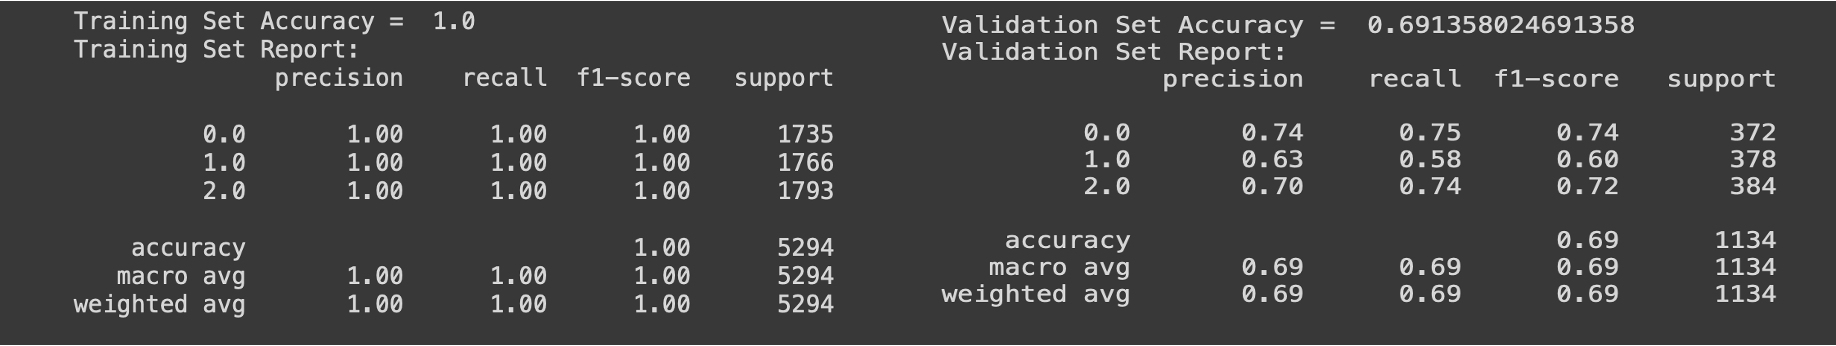

As it can be observed from the classification reports above, the accuracy of the training set is **100%** while the accuracy from the validation set is **69%**. These results clearly show that that the model suffer from overfitting. 

##Feature Reduction Using Principle Component Analysis (PCA) and Linear Discriminant Analysis (LDA)

### Principle Component Analysis (PCA) 

As an effort to reduce overfitting, it was decided to perform dimensionality reduction by applying Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA). It could be said that Feature Reduction can be considered as a way of feature extraction since by applying these feature reduction methods, new features are generated based on the information contained by the features selected. However, one of the drawbacks of these techniques is that the model’s interpretability is lost. By performing the PCA method, the input variables are combined in a specific way such that the dimensionality of the data set is reduced without compensating for the loss of information.

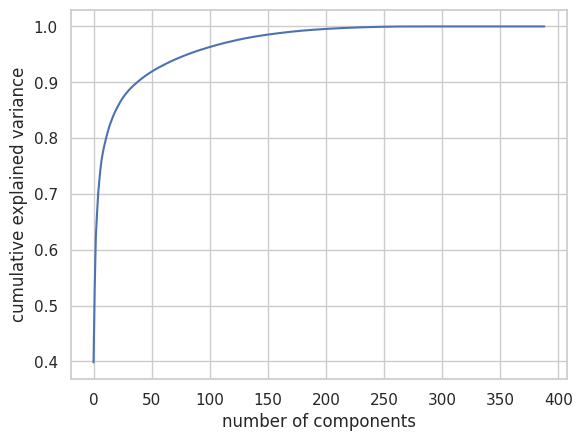

The graph above shows the cumulative explained variance based on the number of components. From the graph it can be observed that a 90% of the variance can be explained  with 50 components. however, it was decided to work with a threshold of 95% of the explained variance, thus resulting in a number of components of 80.

After setting a threshold of the 80 components, the data was transformed into these features and the hyperparameter tuning for Support Vector Machine (SVM) , Random Forest (RF) and Logistic Regression (LR) models was performed. The results can be observed in the table below.


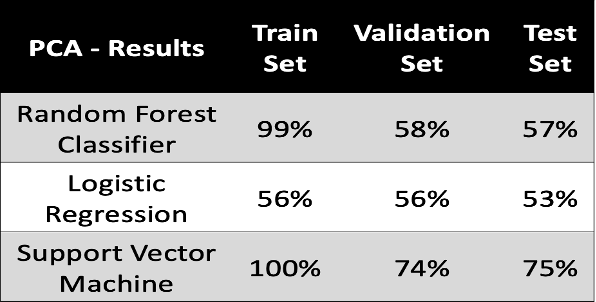

From the PCA results above, it can be observed that the model with a higher accuracy on the validation and test sets is the support vector machine model, followed by the random forest model and logistic regression model. However, the support vector machine and random forest models are still overfitting, while the logistic regression model is the model the presents the least overfitting.

### Linear Discriminant Analysis (LDA)

Another dimensionality reduction method applied parallel to PCA was Linear Discriminant Analysis (LDA).  It can be said that the LDA estimates the probability that a new set of inputs belongs to every class. In other words, LDA finds the linear discriminants that will represent those axes which maximize separation between different classes. It is important to note that unlike PCA, LDA is a supervised algorithm.

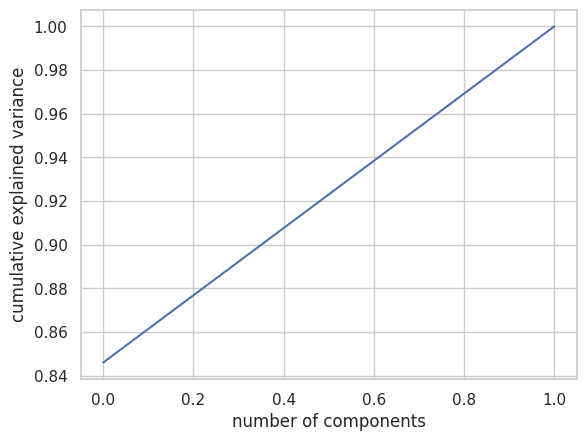

The graph above shows the cumulative explained variance based on the number of components. From the graph it can be observed that a 85% of the variance can be explained  with only one component and 2 components can explain 100% of the variance. 

After setting a threshold of the 2 components, the data was transformed into these features and the hyperparameter tuning for Support Vector Machine (SVM) , Random Forest (RF) and Logistic Regression (LR) models was performed. The results can be observed in the tables below. 


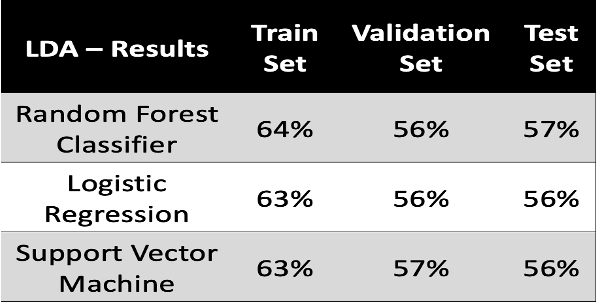

From the LDA results above, it can be observed that the three models are withing the same range in all sets, train, validation and test. Overall, it can be said that the random forest model is the one that has the higher accuracy score in the train and test set, and that the overfitting was reduced in all three models.

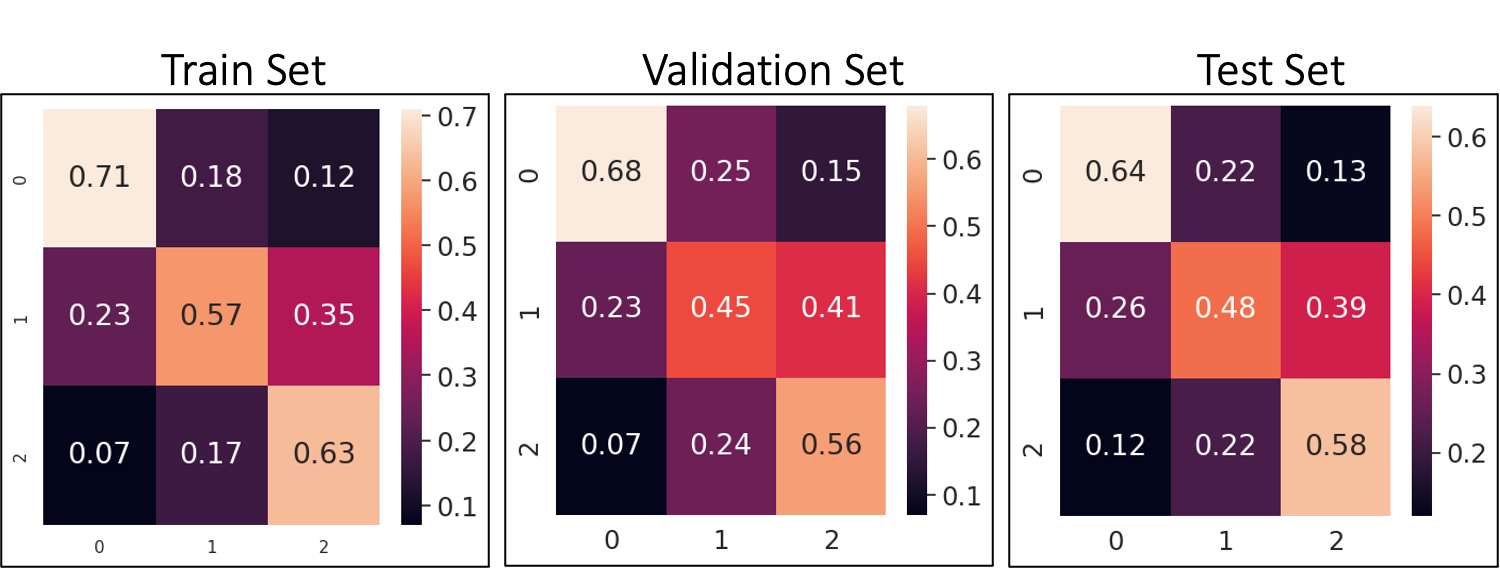

The image above shows the confusion matrix of train, validation and test sets for the random forest model using the 2 LDA components. As it can be observed, the class the model has more trouble classifying correctly is the class one (moderate),as it tends to misclassify the car damage as class two (severe). On the other hand, in all three sets, class 0 (minor) is the class with the higher accuracy of all three classes. 